# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## 1.데이터 가져오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### -. diabetes의 data를 df_X에 저장, diabetes의 target을 df_y에 저장

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df_X = diabetes.data #diabetes.data를 변수 df_X에 저장
df_y = diabetes.target #diabetes.target을 변수 df_y에 저장

In [3]:
print(diabetes.feature_names)
print(diabetes.DESCR)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides lev

In [4]:
df_X = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)

print('df_X의 shape : ', df_X.shape)
df_X.info()
display(df_X.head())

df_y = pd.DataFrame(diabetes.target, columns=['target'])

df_X의 shape :  (442, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


-------------------------

## 2.모델에 입력할 데이터 X 준비하기

### -. df_X에 있는 값들을 numpy array로 변환

In [5]:
X = df_X.values

## 3.모델에 입력할 데이터 X 준비하기

### -. df_y에 있는 값들을 numpy array로 변환

In [6]:
y = df_y['target'].values 

-----------------

## 4.train 데이터와 test 데이터로 분리하기

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--------

## 5.모델 준비하기

### -. 입력 데이터 개수에 맞는 가중치 W와 b를 준비

In [8]:
W = np.random.rand(10)
b = np.random.rand()

In [9]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

## 6.손실함수 loss 정의하기

### -.손실함수를 MSE 함수로 정의

In [10]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [11]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 7.기울기를 구하는 gradient 함수 구현하기

### -. 기울기를 계산하는 gradient 함수를 구현

In [12]:
def gradient(X, W, b, y):
    
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y) 
        
    db = 2 * (y_pred - y).mean()
    return dW, db

In [13]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36784188 -0.31155339 -4.28933084 -3.22575921 -1.54201182 -1.26579259
  2.89037547 -3.14532772 -4.13547252 -2.79292607]
db: -303.4303362867907


## 8.하이퍼 파라미터인 학습률 설정하기

In [14]:
learning_rate = 0.1

#### 하이퍼 파라미터 학습률을 내가 설정한 값으로 모델을 학습시킬수가 있다

--------------

## 9.모델 학습하기

In [15]:
losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 50 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 50 : Loss 5693.9061
Iteration 100 : Loss 5378.9763
Iteration 150 : Loss 5108.9612
Iteration 200 : Loss 4876.8051
Iteration 250 : Loss 4676.5981
Iteration 300 : Loss 4503.3880
Iteration 350 : Loss 4353.0230
Iteration 400 : Loss 4222.0207
Iteration 450 : Loss 4107.4582
Iteration 500 : Loss 4006.8811
Iteration 550 : Loss 3918.2264
Iteration 600 : Loss 3839.7590
Iteration 650 : Loss 3770.0180
Iteration 700 : Loss 3707.7723
Iteration 750 : Loss 3651.9832
Iteration 800 : Loss 3601.7732
Iteration 850 : Loss 3556.4000
Iteration 900 : Loss 3515.2346
Iteration 950 : Loss 3477.7431
Iteration 1000 : Loss 3443.4717
Iteration 1050 : Loss 3412.0335
Iteration 1100 : Loss 3383.0983
Iteration 1150 : Loss 3356.3833
Iteration 1200 : Loss 3331.6458
Iteration 1250 : Loss 3308.6768
Iteration 1300 : Loss 3287.2961
Iteration 1350 : Loss 3267.3474
Iteration 1400 : Loss 3248.6950
Iteration 1450 : Loss 3231.2204
Iteration 1500 : Loss 3214.8200
Iteration 1550 : Loss 3199.4028
Iteration 1600 : Loss 3184.8

---------------------

## 10.test 데이터에 대한 성능 확인하기

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2866.824272422967

#### MSE : 2866.82

---------------------

## 11.정답 데이터와 예측한 데이터 시각화하기

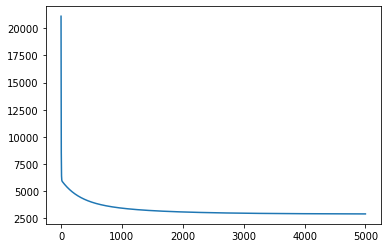

In [17]:
plt.plot(losses)
plt.show()

#### x축값이 500정도에 이르렀을때 완만한 값이 나오는 것을 확인할수 있다.

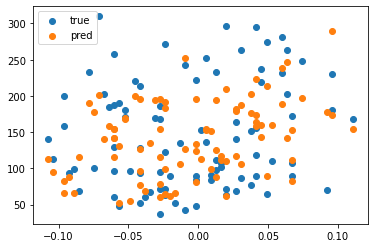

In [18]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

#### 대략적으로 수치값들이 모여있는 것을 확인할수 있었다.

#### x축값이 500정도에 이르렀을때 완만한 값이 나오는 것을 확인할수 있다.

## References

## - 같은 멤버인 박수경님 깃허브 프로젝트 내용 코드 복사

# 회고

## 예시가 없는 프로젝트는 처음이라 너무 어려웠고, 3~4주차까지는 어느정도 수업 진도를 밤새가며 공부하면서 진도를 따라갔으나, 지금은 수업내용이 너무 많아 공부를 해도 수업 속도를 못따라가는 현상이 발생되어 프로젝트에 대한 내용을 대부분 복사해서 붙이는(이해는 하나도 못하고...)상황이라 답답한 프로젝트였음.

### 당뇨병 수치를 구하는 방법인 프로젝트를 진행하는 건데 예시가 없으면 어느정도 이해라도 하게끔 수업 내용 설명을 했으면 좋을듯.

### 7번 내용 기울기를 구하는 gradient 함수 구현하기부터 복붙을 해도 에러가 계속 발생되어 잠을 한숨도 못잠.(새벽에 누구한테 물어볼수도 없고 디스코드에 새벽에 물어보는 건 예의가 아닌거 같아 도움을 얻을곳이 없음)

### 같은 그루인 박수경님의 깃허브 프로젝트 링크주소를 보고 거의 따라하듯이(이해는 하나도 못하고...) 프로젝트 작성

### 지난번 프로젝트도 거의 이해를 못하고 해서 아쉬운게 많았는데 이번 프로젝트는 전체적으로 거의 이해를 하지 못하고 넘어가는 거 같아 많은 고민을 하게 됨.